# Assignment 4 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**QUESTION 1(a)**

In [95]:
def parametric_curve(k):
    '''
    Plot the parametric curve:
    x = cos(t) - cos(kt)
    y = sin(t) - sin(kt)
    for t in [0,2pi]
    
    Note: the number of points plotted is proportional to the constant k
    '''
    t = np.linspace(0,2*np.pi,k*50)
    x = np.cos(t) - np.cos(k*t)
    y = np.sin(t) - np.sin(k*t)
    plt.plot(x,y)
    plt.axis('equal')

**QUESTION 1(b)**

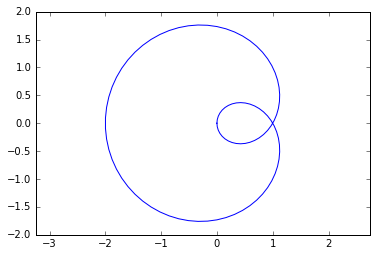

In [96]:
parametric_curve(2)

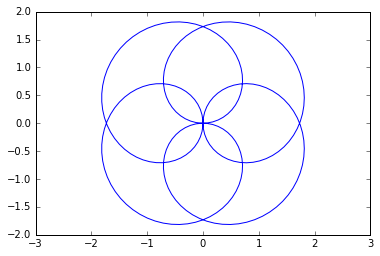

In [97]:
parametric_curve(5)

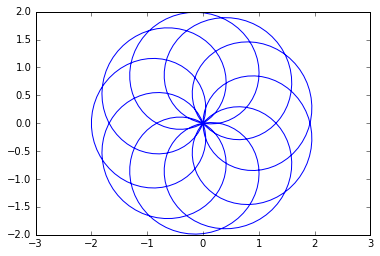

In [98]:
parametric_curve(10)

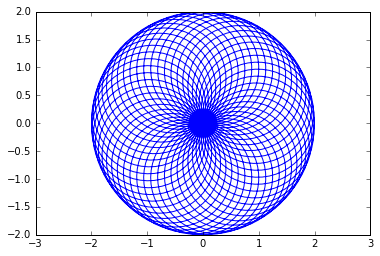

In [99]:
parametric_curve(50)

**QUESTION 2**

In [104]:
def plot_fun(f,interval,title):
    "Plot the given vectorized function f over the interval with a title." 
    a = interval[0]
    b = interval[1]
    # The number of plotted points is proportional to the size of interval
    x = np.linspace(a,b,(b-a)*50)
    y = f(x)
    plt.plot(x,y)
    plt.title(title)
    plt.xlim([a,b])

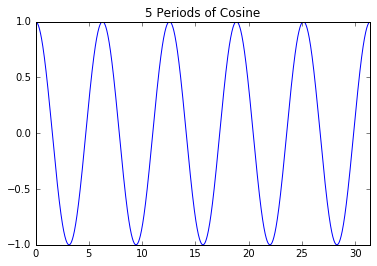

In [105]:
plot_fun(np.cos,[0,10*np.pi],'5 Periods of Cosine')

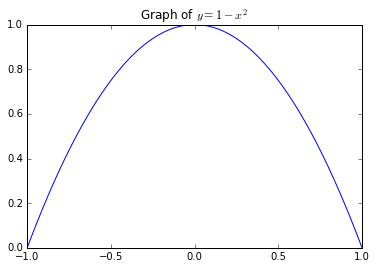

In [106]:
# Let's define our own function to plot
# The opeations defining g are already vectorized
def g(x):
    return 1-x**2

plot_fun(g,[-1,1],'Graph of $y = 1 - x^2$')

**QUESTION 3**

In [107]:
def dice_game(num_dice,winner):
    '''
    Roll the dice until the winner is rolled.
    
    A roll of num_dice many dice is the sum of num_dice random numbers chosen from {1,2,3,4,5,6}.
    For example, if num_dice is 2, a roll is the sum of 2 random integers chosen uniformly from {1,2,3,4,5,6}.
    '''
    roll = np.random.randint(1,7,num_dice).sum()
    while roll != winner:
        print('You rolled a ' + str(roll) + '! Try again.')
        roll = np.random.randint(1,7,num_dice).sum()
    print('You rolled a ' + str(winner) + '! You win!')

In [109]:
dice_game(5,20)

You rolled a 18! Try again.
You rolled a 17! Try again.
You rolled a 21! Try again.
You rolled a 19! Try again.
You rolled a 24! Try again.
You rolled a 15! Try again.
You rolled a 17! Try again.
You rolled a 27! Try again.
You rolled a 23! Try again.
You rolled a 18! Try again.
You rolled a 19! Try again.
You rolled a 15! Try again.
You rolled a 11! Try again.
You rolled a 15! Try again.
You rolled a 16! Try again.
You rolled a 18! Try again.
You rolled a 17! Try again.
You rolled a 13! Try again.
You rolled a 11! Try again.
You rolled a 14! Try again.
You rolled a 10! Try again.
You rolled a 16! Try again.
You rolled a 15! Try again.
You rolled a 17! Try again.
You rolled a 18! Try again.
You rolled a 19! Try again.
You rolled a 22! Try again.
You rolled a 17! Try again.
You rolled a 17! Try again.
You rolled a 17! Try again.
You rolled a 29! Try again.
You rolled a 18! Try again.
You rolled a 21! Try again.
You rolled a 12! Try again.
You rolled a 20! You win!


**QUESTION 4(a)**

$$
f_N(x) = \frac{4}{\pi} \sum_{n = 0}^N \frac{ \sin(2\pi(2n+1)x) }{(2n+1)}
$$

**QUESTION 4(b)**

In [111]:
def square_wave(N,interval):
    "Plot the Nth partial sum of the Fourier series of the square wave over the given interval."
    a = interval[0]
    b = interval[1]
    # The number of plotted points is proportional to N as well as the size of the interval
    x = np.linspace(a,b,(b-a)*(N+1)*50)
    # Create a list of NumPy arrays where, for each n, we compute the array
    # np.sin(2*np.pi*(2*n+1)*x)/(2*n+1)
    # and then we sum the arrays to get the appropriate array of y values
    y = (4/np.pi) * sum([ np.sin(2*np.pi*(2*n+1)*x)/(2*n+1) for n in range(0,N+1) ])
    plt.plot(x,y)

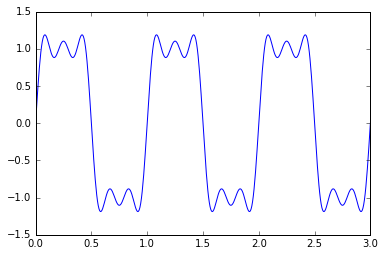

In [112]:
square_wave(2,[0,3])

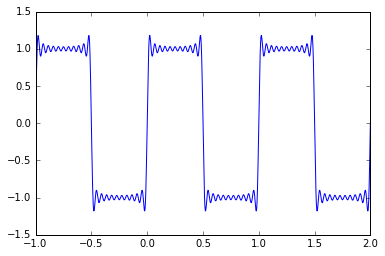

In [113]:
square_wave(10,[-1,2])

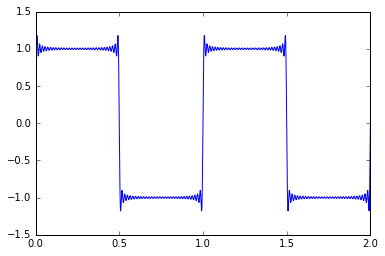

In [114]:
square_wave(30,[0,2])

**QUESTION 5(a)**

The Taylor series of $\ln(x)$ centered at $x=1$ is given by:

$$
\ln(x) = \sum_{n = 1}^{\infty} \frac{ (-1)^{n+1} }{ n } (x-1)^n \ , \ \ x \in (0,2) \, .
$$


**QUESTION 5(b)**

In [126]:
def ln_taylor(x,N):
    if abs(x-1) >= 1:
        print('Error: x value is outside the radius of convergence.')
        return None
    else:
        return sum([ (-1)**(n+1)*(x-1)**n/n for n in range(1,N+1) ])

In [127]:
ln_taylor(0.5,20)

-0.6931471370510288

In [128]:
-np.log(2)

-0.69314718055994529

In [129]:
ln_taylor(3,10)

Error: x value is outside the radius of convergence.


**QUESTION 6(a)**

Let $\pi(x)$ be the prime-counting function: for any real number $x$, the value $\pi(x)$ is the number of primes $p$ less than or equal to $x$. Then

$$
\lim_{x \to \infty} \frac{ \pi(x) }{ x / \ln(x) } = 1
$$


**QUESTION 6(b)**

In [132]:
def is_prime_binary(n):
    "Return 1 if n is prime and 0 if n is not prime."
    if n <= 1:
        return 0
    elif n == 2:
        return 1
    else:
        for d in range(2,int(n**0.5)+1):
            if n % d == 0:
                return 0
        return 1

def prime_number_theorem(N):
    "Plot the function y = x/ln(x) and the prime counting function y = pi(x) over the interval [2,N]."
    x1 = np.linspace(2,N,100)
    y1 = x1/np.log(x1)
    x2 = np.arange(2,N+1)
    # Create an array of 0s and 1s (using is_prime_binary) where the 1s represent prime numbers
    # The cumulative sum of the array is exactly the prime counting function
    # evaluated at each entry of x2
    y2 = np.array([ is_prime_binary(x) for x in x2 ]).cumsum()
    plt.plot(x1,y1)
    # The drawstyle option displays the prime counting function as a step function
    plt.plot(x2,y2,drawstyle='steps-post')
    plt.title('Prime Number Theorem')

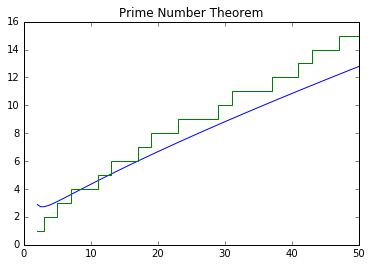

In [134]:
prime_number_theorem(50)

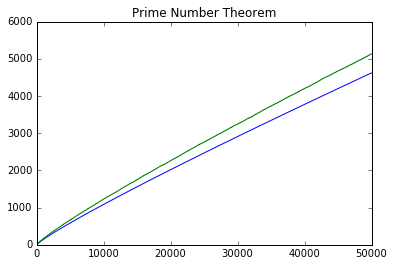

In [135]:
prime_number_theorem(50000)